**复习：**在前面我们已经学习了Pandas基础，知道利用Pandas读取csv数据的增删查改，今天我们要学习的就是**探索性数据分析**，主要介绍如何利用Pandas进行排序、算术计算以及计算描述函数describe()的使用。

# 1 第一章：探索性数据分析

#### 开始之前，导入numpy、pandas包和数据

In [1]:
#加载所需的库
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns  # for titanic data only

# from matplotlib.patches import Patch  # to create the colored squares for the legend

In [2]:
#载入之前保存的train_chinese.csv数据，关于泰坦尼克号的任务，我们就使用这个数据

# load the dataframe
df = sns.load_dataset('titanic')
# df = pd.read_csv('./data/train.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1.6 了解你的数据吗？
教材《Python for Data Analysis》第五章

#### 1.6.1 任务一：利用Pandas对示例数据进行排序，要求升序

In [ ]:
# 具体请看《利用Python进行数据分析》第五章 排序和排名 部分

#自己构建一个都为数字的DataFrame数据

df1 = pd.DataFrame(np.arange(8).reshape(2,4),
                    index=['2','1'],
                    columns=['d','a','b','c'])
df1

,d,a,b,c
2,0,1,2,3
1,4,5,6,7


【代码解析】

pd.DataFrame() ：创建一个DataFrame对象 

np.arange(8).reshape((2, 4)) : 生成一个二维数组（2*4）,第一列：0，1，2，3 第二列：4，5，6，7

index=['2, 1] ：DataFrame 对象的索引列

columns=['d', 'a', 'b', 'c'] ：DataFrame 对象的索引行

【问题】：大多数时候我们都是想根据列的值来排序,所以将你构建的DataFrame中的数据根据某一列，升序排列

In [ ]:
#回答代码
df1.sort_values(by='c', ascending=True)

,d,a,b,c
2,0,1,2,3
1,4,5,6,7


【思考】通过书本你能说出Pandas对DataFrame数据的其他排序方式吗？

【总结】下面将不同的排序方式做一个总结

1.让行索引升序排序

In [ ]:
#代码
df1.sort_index()

,d,a,b,c
1,4,5,6,7
2,0,1,2,3


2.让列索引升序排序


In [ ]:
#代码
df1.sort_index(axis=1)

,a,b,c,d
2,1,2,3,0
1,5,6,7,4


3.让列索引降序排序

In [ ]:
#代码
df1.sort_index(axis=1,ascending=False)

,d,c,b,a
2,0,3,2,1
1,4,7,6,5


4.让任选两列数据同时降序排序

In [ ]:
#代码
df1.sort_values(by=['a','c'],ascending=False)

,d,a,b,c
1,4,5,6,7
2,0,1,2,3


#### 1.6.2 任务二：对泰坦尼克号数据（trian.csv）按票价和年龄两列进行综合排序（降序排列），从这个数据中你可以分析出什么？

In [ ]:
'''
在开始我们已经导入了train_chinese.csv数据，而且前面我们也学习了导入数据过程，根据上面学习，我们直接对目标列进行排序即可
head(20) : 读取前20条数据
'''
display(df.columns.values)
df.head(20)

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
#代码
df.sort_values(by=['fare','age'],ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
674,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


【思考】排序后，如果我们仅仅关注年龄和票价两列。根据常识我知道发现票价越高的应该客舱越好，所以我们会明显看出，票价前20的乘客中存活的有14人，这是相当高的一个比例，那么我们后面是不是可以进一步分析一下票价和存活之间的关系，年龄和存活之间的关系呢？当你开始发现数据之间的关系了，数据分析就开始了。

当然，这只是我的想法，你还可以有更多想法，欢迎写在你的学习笔记中。

**多做几个数据的排序**

In [ ]:
categorical_vars = df.columns.values.tolist()
categorical_vars

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [ ]:
ct = pd.crosstab(df.survived, df.pclass)
ct

pclass,1,2,3
survived,,,
0,80,97,372
1,136,87,119


In [ ]:
#代码
df['survived'].corr(df['age'])

-0.07722109457217761

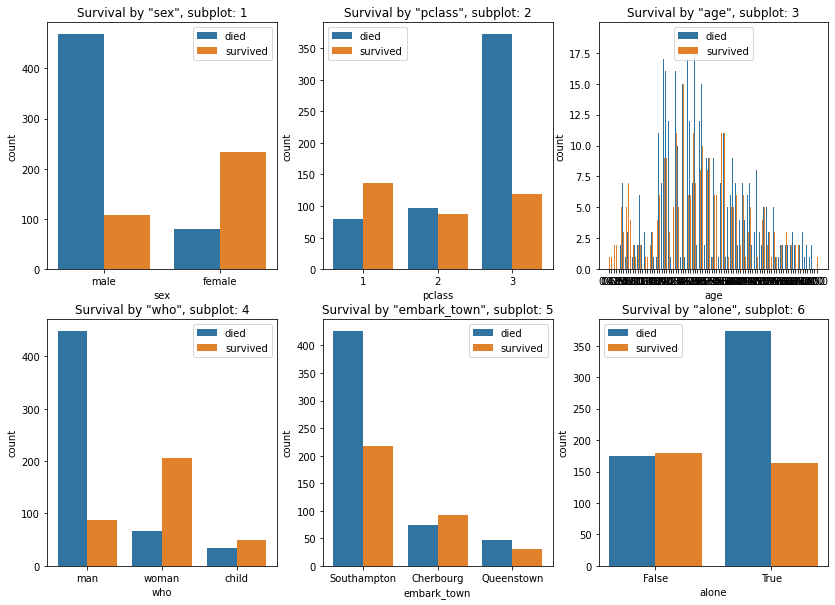

In [ ]:
#  Categorical Data
plot_cate = ['sex', 'pclass', 'age', 'who', 'embark_town', 'alone']

fig = plt.figure(figsize=(14,10))
plotCnt = 1       # initialize plot number

for i in plot_cate:
    # df_ct = df.groupby(i)['survived'].value_counts(normalize=True)
    # df_ct = df_ct.mul(100)
    # df_ct = df_ct.rename('percent').reset_index()

    fig.add_subplot(2,3,plotCnt)
    ax = sns.countplot(x=i,hue='survived',data=df)
    
    # g = sns.catplot(x=i, y='percent', hue=y, kind='bar', data=df_ct)
    # g.ax.set_ylim(0,100)
    plt.title('Survival by \"{}\", subplot: {}'.format(i, plotCnt))
    plt.xlabel(i)
    plt.axis('auto')
    plt.legend(('died', 'survived'), loc='best')

    # plt.subplot(a, b, c)
    plotCnt = plotCnt + 1

plt.show()

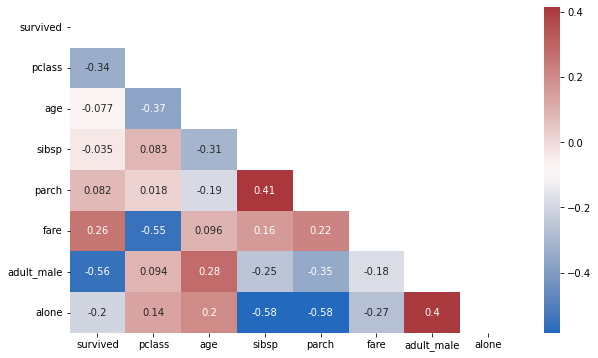

In [ ]:
plt.figure(figsize=(10,6))

# creating mask
mask = np.triu(np.ones_like(df.corr()['survived']))
sns.heatmap(df.corr(), cmap='vlag', annot=True, mask=mask)

plt.show()

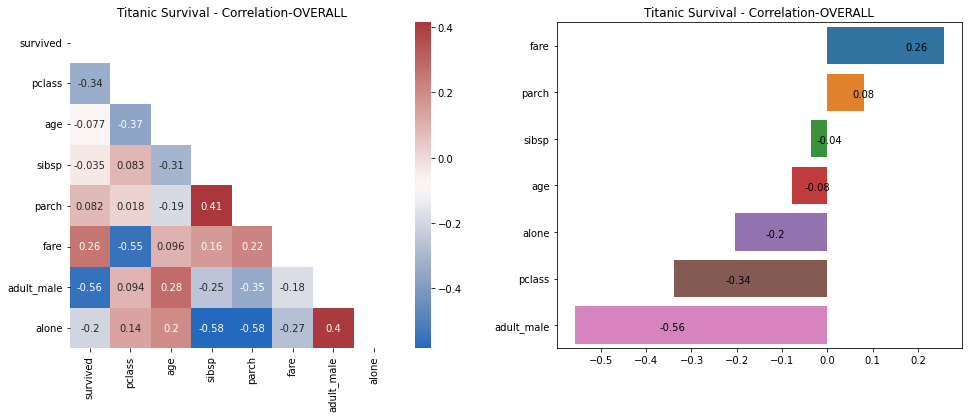

In [ ]:
#  Correlation TABLE
df_corr = df.corr()['survived'].sort_values(ascending=False)
df_corr = df_corr.drop(['survived'])

#  heatmap and barplot
fig = plt.figure(figsize=(16,6))

fig.add_subplot(121)
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap='vlag', annot=True, mask=mask)
# sns.heatmap(df_TRN.corr(), annot=True, fmt='.2f', square=True, cmap = 'Greens')
plt.title('Titanic Survival - Correlation-OVERALL', fontsize=12)

fig.add_subplot(122)
plt.title('Titanic Survival - Correlation-OVERALL', fontsize=12)
ax = sns.barplot(y=df_corr.index,x=df_corr.values)

for i in ax.patches: 
    plt.text(i.get_width()/1.5, i.get_y()+.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, color ='black')

plt.show()

#### 1.6.3 任务三：利用Pandas进行算术计算，计算两个DataFrame数据相加结果

In [ ]:
# 具体请看《利用Python进行数据分析》第五章 算术运算与数据对齐 部分

#自己构建两个都为数字的DataFrame数据

# 我们举了一个例子：
frame1_a = pd.DataFrame(np.arange(9.).reshape(3, 3),
                     columns=['a', 'b', 'c'],
                     index=['one', 'two', 'three'])
frame1_b = pd.DataFrame(np.arange(12.).reshape(4, 3),
                     columns=['a', 'e', 'c'],
                     index=['first', 'one', 'two', 'second'])

In [ ]:
#代码
display(frame1_a)
display(frame1_b)

,a,b,c
one,0.0,1.0,2.0
two,3.0,4.0,5.0
three,6.0,7.0,8.0


,a,e,c
first,0.0,1.0,2.0
one,3.0,4.0,5.0
two,6.0,7.0,8.0
second,9.0,10.0,11.0


将frame_a和frame_b进行相加


In [ ]:
#代码
frame2 = frame1_a + frame1_b
frame2

,a,b,c,e
first,NaN,NaN,NaN,NaN
one,3.0,NaN,7.0,NaN
second,NaN,NaN,NaN,NaN
three,NaN,NaN,NaN,NaN
two,9.0,NaN,13.0,NaN


【提醒】两个DataFrame相加后，会返回一个新的DataFrame，对应的行和列的值会相加，没有对应的会变成空值NaN。<br>
当然，DataFrame还有很多算术运算，如减法，除法等，有兴趣的同学可以看《利用Python进行数据分析》第五章 算术运算与数据对齐 部分，多在网络上查找相关学习资料。

#### 1.6.4 任务四：通过泰坦尼克号数据如何计算出在船上最大的家族有多少人？

In [ ]:
'''
还是用之前导入的chinese_train.csv如果我们想看看在船上，最大的家族有多少人（‘兄弟姐妹个数’+‘父母子女个数’），我们该怎么做呢？
'''


In [12]:
#代码
df['survived'][df['who']=='woman'].count() + df['survived'][df['who']=='child'].count()

354

【提醒】我们只需找出”兄弟姐妹个数“和”父母子女个数“之和最大的数，当然你还可以想出很多方法和思考角度，欢迎你来说出你的看法。

**多做几个数据的相加，看看你能分析出什么？**

In [ ]:
#代码


#### 1.6.5 任务五：学会使用Pandas describe()函数查看数据基本统计信息

In [13]:
#(1) 关键知识点示例做一遍（简单数据）
# 具体请看《利用Python进行数据分析》第五章 汇总和计算描述统计 部分

#自己构建一个有数字有空值的DataFrame数据

# 我们举了一个例子：
frame3 = pd.DataFrame([[1.4, np.nan], 
                       [7.1, -4.5],
                       [np.nan, np.nan], 
                       [0.75, -1.3]
                      ], index=['a', 'b', 'c', 'd'], columns=['one', 'two'])
frame3

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [14]:
#代码
frame3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     2 non-null      float64
dtypes: float64(2)
memory usage: 268.0+ bytes


调用 describe 函数，观察frame2的数据基本信息

In [15]:
#代码
frame3.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


#### 1.6.6 任务六：分别看看泰坦尼克号数据集中 票价、父母子女 这列数据的基本统计数据，你能发现什么？

In [ ]:
'''
看看泰坦尼克号数据集中 票价 这列数据的基本统计数据
'''

In [ ]:
#代码


【思考】从上面数据我们可以看出，试试在下面写出你的看法。然后看看我们给出的答案。

当然，答案只是我的想法，你还可以有更多想法，欢迎写在你的学习笔记中。

**多做几个组数据的统计，看看你能分析出什么？**

In [ ]:
# 写下你的其他分析




【思考】有更多想法，欢迎写在你的学习笔记中。

【总结】本节中我们通过Pandas的一些内置函数对数据进行了初步统计查看，这个过程最重要的不是大家得掌握这些函数，而是看懂从这些函数出来的数据，构建自己的数据分析思维，这也是第一章最重要的点，希望大家学完第一章能对数据有个基本认识，了解自己在做什么，为什么这么做，后面的章节我们将开始对数据进行清洗，进一步分析。

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=baac8304-fdea-41da-a182-a605c2edce87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>